In [9]:
import torch # torch를 불러옴
import torch.nn as nn # torch의 신경망 모델을 불러옴
import torch.optim as optim # torch의 경사하강법 알고리즘을 불러옴
import torch.nn.init as init # 텐서에 초기값을 주기 위해 필요한 함수들 불러옴
import matplotlib.pyplot as plt # loss를 시각화 하기위해 plot를 만드는 라이브러리

In [3]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)
x = init.uniform_(torch.Tensor(num_data,1), -15, 15)
y = (x**2) + 3
y_noise = y + noise

In [5]:
model = nn.Sequential(
        nn.Linear(1,6),
        nn.ReLU(),
        nn.Linear(6,10),
        nn.ReLU(),
        nn.Linear(10,6),
        nn.ReLU(),
        nn.Linear(6,1),
)

In [7]:
loss_func = nn.L1Loss() #L1 loss를 사용
optimizer = optim.SGD(model.parameters(), lr=0.0002) # 최적의 가중치와 편차를 근사화 하는 역할 SGD(stochastic gradient descent)

loss_array = []

In [8]:
for i in range(num_epoch):
    optimizer.zero_grad() # 이전의 기울기 값을 0으로 초기화(다음 학습부분 기울기를 받아오기 위해서)
    output = model(x) # 선형회귀모델에 x를 전달하고 output에 저장
    loss = loss_func(output, y_noise) # L1손실함수 정의에 따라서 output과 y_noise 차이를 저장
    loss.backward() # loss를 사용하여 각 변수 w, b에 대한 기울기 계산
    optimizer.step() # 인수로 들어간 model.parameters()에서 리턴되는 변수들의 기울기에 0.0002를 곱한값을 빼줌으로 업데이트
    loss_array.append(loss)

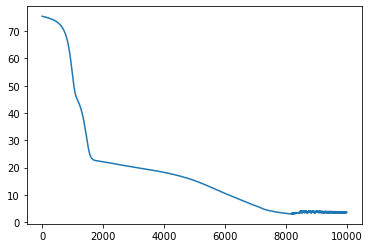

In [10]:
plt.plot(loss_array)
plt.show()